# Análise Exploratória - Bitcoin

## Importar dependências

In [258]:
# Manipulação de dados
import pandas as pd

# 1. Ler e pré-processar dados

## 1.1 Dataset Bitcoin

In [259]:
bitcoin_df = pd.read_csv('bitcoin.csv')

Vamos inspecionar algumas caracteristicas dos dados

In [260]:
bitcoin_df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


Quantas linhas e colunas temos nos nossos dados?

In [261]:
r,c = bitcoin_df.shape
print(f"Número de linhas: {r}")
print(f"Número de colunas: {c}")

Número de linhas: 4857377
Número de colunas: 8


Devemos também verificar a presença de valores em falta (NaN).
Mais concretamente quantos valores faltam em cada coluna

In [262]:
bitcoin_df.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

**Visto que o nossos dados têm mais de 4 milhões de linhas, e contêm informação ao minuto, vamos agrupá-los por dias, utilizando a média diária. Isto irá fornecer uma perspetiva mais macro, associada a um alívio enorme de carga computacional**

In [263]:
# Criar coluna com a data a partir do timestamp
bitcoin_df["Date"] = pd.to_datetime(bitcoin_df["Timestamp"], unit="s").dt.date
# Podemos agora apagar o timestamp
bitcoin_df.drop(columns=["Timestamp"], inplace=True)
# Agora agrupamos por dia, utilizando a média
bitcoin_df = bitcoin_df.groupby("Date").mean()
# Converting the index as date
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)

Vamos inspecionar agora a estrutura dos nossos dados, assim como o número de `NaN` (valores em falta)

In [264]:
bitcoin_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Date,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [265]:
bitcoin_df.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

Como podemos observar não foi necessário apagar nenhuma linha, utilizando a média diária conseguimos não ter nenhum valor em falta.

## 1.2 Dataset Tweets do Elon Musk
Este dataset está dividido em vários ficheiros `.csv`, um para cada ano (2010-2021). 
Podemos ler os vários ficheiros e depois concatená-los num só `dataframe`.

In [266]:
# Importar biblioteca para ler a localização dos ficheiros
import glob

# Encontrar localizacao dos datasets
all_files = glob.glob("elon_musk_tweets/*.csv")

# Criar lista para os datasets
li=[]

for file in all_files:
    # Ler sub-dataset
    df = pd.read_csv(file, index_col='id')
    # Adicionar a lista
    li.append(df)

# Criar dataset através da concatenatação dos vários sub-datasets
tweets_df = pd.concat(li, axis=0)

Agora podemos inspecionar algumas características do nosso dataset

In [267]:
tweets_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,43956.0,4.387433e+03,3.480321e+03,0.000000e+00,1.289000e+03,3.463000e+03,7.126000e+03,1.233800e+04
conversation_id,43956.0,8.837439e+17,3.381733e+17,1.659576e+09,6.954503e+17,9.805180e+17,1.152228e+18,1.373669e+18
created_at,43956.0,1.499974e+12,8.050325e+10,1.275676e+12,1.455611e+12,1.523385e+12,1.563781e+12,1.616379e+12
timezone,43956.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
place,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,43956.0,4.419640e+07,0.000000e+00,4.419640e+07,4.419640e+07,4.419640e+07,4.419640e+07,4.419640e+07
user_id_str,43956.0,4.419640e+07,0.000000e+00,4.419640e+07,4.419640e+07,4.419640e+07,4.419640e+07,4.419640e+07
day,43956.0,4.127969e+00,1.963408e+00,1.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
hour,43956.0,1.241473e+01,7.763416e+00,0.000000e+00,5.000000e+00,1.500000e+01,1.900000e+01,2.300000e+01
video,43956.0,6.570207e-02,2.477634e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


Podemos logo ver que existem colunas com valores `NaN`, e parecem exister várias colunas. Vamos ver quantas ao certo, assim como o número de tweets.

In [268]:
r, c = tweets_df.shape

print(f"Número de tweets: {r}")
print(f"Número de features de cada tweet: {c}")

Número de tweets: 43956
Número de features de cada tweet: 38


Vamos apenas manter a coluna `date`, que indica a data, e a coluna `tweet`, que contêm o texto do tweet.
No entanto nem todos os **tweets** são referentes a Bitcoin, vamos filtrar para conter apenas os que têm a palavra "bitcoin" na coluna `tweet` (que contêm o conteúdo do tweet).

In [269]:
# Filtrar colunas
tweets_df=tweets_df[["tweet", "date"]]
tweets_df['date']= pd.to_datetime(tweets_df['date'])
# Fazer da coluna `created_at` o index
tweets_df = tweets_df.set_index("date")
# Filtrar tweets para apenas os que contenham "bitcoin", "criptocurrency" ou "cripto"
tweets_df = tweets_df[tweets_df['tweet'].str.lower().str.contains('bitcoin|criptocurrency|cripto')]

Quantos tweets temos agora?

In [270]:
tweets_df.shape[0]

24

Surpreendemente o número de tweets referentes à temática do Bitcoin é **bastante baixo**. Seria de esperar um maior volume, pois o Elon Musk é muitas vezes atribuído como o "culpado" das oscilações bruscas de preço.

In [271]:
tweets_df

,tweet
date,
2018-10-22 23:51:15,@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...
2020-12-20 09:24:37,Bitcoin is almost as bs as fiat money
2020-12-20 08:21:25,Bitcoin is my safe word
2020-11-16 22:02:51,@Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶
2020-05-15 22:51:44,@jk_rowling I still only own 0.25 Bitcoins btw
2020-05-15 22:03:01,"@jk_rowling Pretty much, although massive curr..."
2020-05-01 22:44:56,@Bitcoin How much for some anime Bitcoin? htt...
2020-05-01 22:34:24,@Bitcoin 🤣🤣
2020-01-10 06:58:23,@bitcoin2020conf 😉


**Quais serão as palavras mais frequentes nos tweets sobre Bitcoin e criptomoedas?**

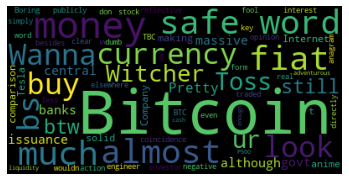

In [272]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Gerar nuvem de palavras
words=''
for text in tweets_df['tweet']:
    # Remover todas as palavras começadas por "@" (menções), e as "palavras" que contêm "http" (são links)
    text = ' '.join(filter(lambda x:x[0]!='@' and 'http' not in x, text.split()))
    # Adicionar as palavras
    words+= ' ' + text
    
wordcloud = WordCloud().generate(words)
# Fazer plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Dataset das notícias do The New York Times

In [273]:
# Ler o dataset
news_df = pd.read_csv('news.csv')

Vamos inspecionar a estrutura geral dos dados

In [274]:
news_df.head()

,timestamp,title,score
0,1.618500e+09,Bitcoin Is Normal Now. Yay?,0.5267
1,1.619330e+09,We�re All Crypto People Now,0.0000
2,1.619521e+09,Tesla Makes Money (Including From Selling Cars),0.0000
3,1.616498e+09,Miami Wants to Be the Hub for Bitcoin,0.0000
4,1.618657e+09,Crypto Is Minting Lobbyists,0.0000


Como podemos observar este dataset não apresenta um elevado número de *features*, havendo apenas um `timestamp` (que deverá ser convertido para data), um `title` (título da notícia), e um `score`. Este `score` indica a positividade/negatividade presente no título da notícia (**sentiment analysis**), e foi previamente calculado usando a biblioteca de processamento de linguagem natural `nltk`.

In [275]:
# Em primeiro vamos converter o timestamp para uma data
news_df["Date"] = pd.to_datetime(news_df["timestamp"], unit="s")
print(news_df["Date"].dtypes)
# Agora podemos apagar a coluna 'timestamp'
news_df.drop(columns=["timestamp"], inplace=True)
# E colocamos a coluna "Date" como index
news_df = news_df.set_index("Date")

datetime64[ns]


In [276]:
news_df

,title,score
Date,,
2021-04-15 15:17:21,Bitcoin Is Normal Now. Yay?,0.5267
2021-04-25 06:00:10,We�re All Crypto People Now,0.0000
2021-04-27 10:53:52,Tesla Makes Money (Including From Selling Cars),0.0000
2021-03-23 11:21:35,Miami Wants to Be the Hub for Bitcoin,0.0000
2021-04-17 11:00:04,Crypto Is Minting Lobbyists,0.0000
...,...,...
2014-06-03 14:30:45,"Year-End Roundup 2013-2014 | Social Studies, H...",0.0000
2020-02-09 22:11:02,"Ransomware Attacks Grow, Crippling Cities and ...",-0.4404
2021-04-15 18:48:12,Your Friday Briefing,0.0000


Quantas notícias temos?

In [277]:
news_df.shape[0]

1010

Verifiquemos a existência de valores em falta (`NaN`)

In [278]:
news_df.isna().sum()

title    0
score    0
dtype: int64

Como podemos observar neste dataset não existe nenhum valor em falta.
**Num próximo passo podemos explorar como será a distribuição da análise de sentimento do título da notícia. Será que segue uma distribuição normal?**

<AxesSubplot:ylabel='Density'>

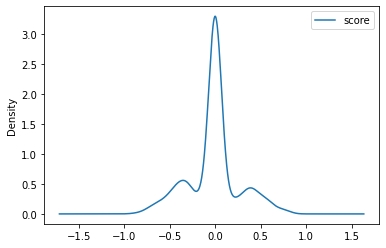

In [279]:
news_df.plot.kde()

Como podemos observar a análise de sentimento segue uma distribuição **aproximadamente** normal. Sendo que a maioria das notícias apresenta um score de 0, o que indica neutralidade (algo que se espera em escrita jornalistica).

**Como terá sido a evolução do número de notícias, relacionadas com Bitcoin, ao longo dos anos?** **ACABAR ESTE PLOT**

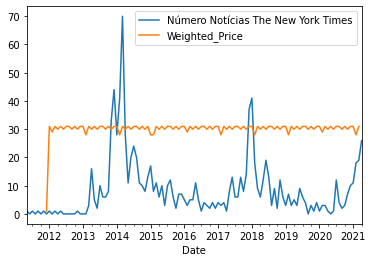

In [280]:
news_df.resample('1M')["title"].count().plot(label='Número Notícias The New York Times')
# TO
bitcoin_df.resample('1M')['Weighted_Price'].count().plot()
plt.legend()

**Quais as principais palavras presentes nos títulos destas notícias?**

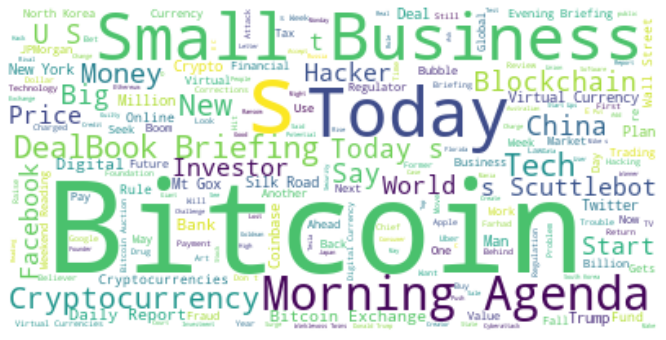

In [294]:

# Gerar nuvem de palavras
words = ' '.join(news_df['title'])
    
wordcloud = WordCloud( background_color='white', max_words=1500).generate(words)
# Fazer plot
# Plot
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()